<h2>Sentimental Analysis of Oppenheimer's Review

<h3>Importing Libraries</h3>

First, let's import the necessary libraries:

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

<h3>Loading the Data</h3>

Load the CSV data into a pandas DataFrame named `df` using the `pd.read_csv` function. Then, generate descriptive statistics for all columns to understand the basic structure of the data:

In [3]:
# Load the CSV data into a DataFrame
df = pd.read_csv(r"C:\Users\HP\Documents\GitHub\Oppenheimer movie review\oppenheimer_review.csv")

# Displaying the first few rows
df.head()


,Comment,Rating
0,I was familiar with the Manhattan project and ...,9
1,Just came out of the theater and watching Oppe...,8
2,Is it just me or did anyone else find this mov...,10
3,Authentic audio-visual journey to the era of t...,10
4,This movie pretends to be clever and artistic ...,8


In [6]:
# Remove rows with missing values and duplicate comments
df.dropna(inplace=True)
df.drop_duplicates(subset=['Comment'], inplace=True)
df.describe(include='all')

,Comment,Rating
count,1533,1533.000000
unique,1533,NaN
top,I was familiar with the Manhattan project and ...,NaN
freq,1,NaN
mean,NaN,8.521853
std,NaN,2.076619
min,NaN,1.000000
25%,NaN,8.000000
50%,NaN,9.000000
75%,NaN,10.000000


<h3>Rating Analysis</h3>

Define a function `rating` to analyze the numeric ratings and classify them as Positive, Neutral, or Negative:

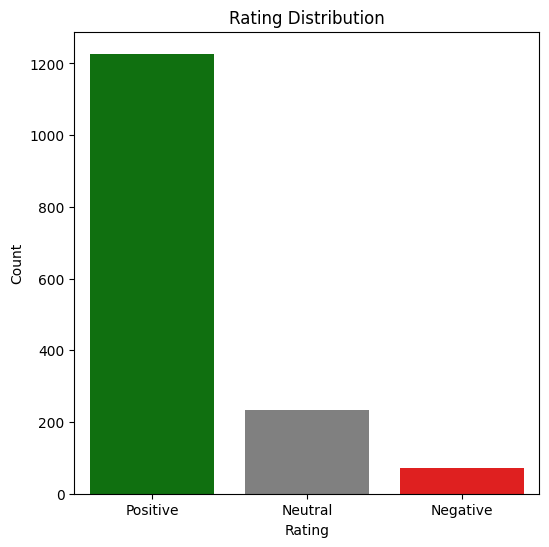

In [7]:
def rating(x):
    if x >= 8 and x <= 10:
        return 'Positive'
    elif x >= 4 and x <= 7:
        return 'Neutral'
    else:
        return 'Negative'

df['rating_analysis'] = df['Rating'].apply(rating)

# Visualize the rating distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='rating_analysis', data=df, palette=['green', 'gray', 'red'])
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<h3>Text Preprocessing</h3>

Apply text preprocessing to the 'Comment' column, which involves removing special characters, converting text to lowercase, and tokenizing the text for sentiment analysis:

In [8]:
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    
    # Remove special characters
    comment = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", comment)
    
    # Tokenize the comment
    tokens = comment.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a sentence
    processed_comment = " ".join(filtered_tokens)
    return processed_comment

# Apply the preprocessing function to the 'Comment' column
df['Comment'] = df['Comment'].apply(preprocess_comment)

<h3>Sentiment Analysis</h3>

Perform sentiment analysis using the TextBlob library. The function `analyze_sentiment` calculates the polarity of each comment and assigns sentiment labels:

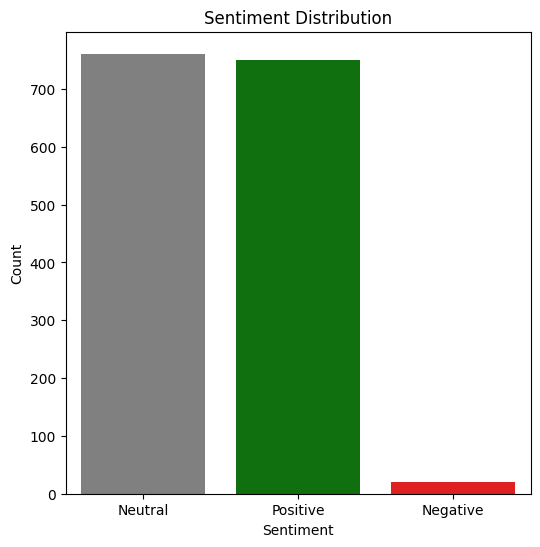

In [9]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.2:
        sentiment = 'Positive'
    elif polarity < -0.2:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment, polarity

df['Sentiment'], df['Polarity'] = zip(*df['Comment'].apply(analyze_sentiment))

# Visualize the sentiment distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Sentiment', data=df, palette=['gray', 'green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<h3>Final Rating</h3>

Create the 'final_rating' column by combining the sentiment analysis and rating analysis results:

In [10]:
# Create the 'final_rating' column
df['final_rating'] = 'Positive'

# Loop through the DataFrame and assign final ratings
for index, row in df.iterrows():
    comment_rating = row['Sentiment']
    rating_analysis = row['rating_analysis']
    if (comment_rating == 'Positive' and rating_analysis == 'Positive'):
        df.at[index, 'final_rating'] = 'Positive'
    elif (comment_rating == 'Positive' and rating_analysis == 'Neutral') or (comment_rating == 'Neutral' and rating_analysis == 'Positive'):
        df.at[index, 'final_rating'] = 'Positive'
    elif (comment_rating == 'Negative' and rating_analysis == 'Neutral') or (comment_rating == 'Neutral' and rating_analysis == 'Negative'):
        df.at[index, 'final_rating'] = 'Negative'
    elif (comment_rating == 'Neutral' and rating_analysis == 'Neutral'):
        df.at[index, 'final_rating'] = 'Neutral'
    elif (comment_rating == 'Negative' and rating_analysis == 'Negative'):
        df.at[index, 'final_rating'] = 'Negative'
    else:
        df.at[index, 'final_rating'] = 'Neutral'
df.head(10)

,Comment,Rating,rating_analysis,Sentiment,Polarity,final_rating
0,familiar manhattan project social political af...,9,Positive,Neutral,0.180751,Positive
1,came theater watching oppenheimer great experi...,8,Positive,Positive,0.278333,Positive
2,anyone else find movie hate say boring know kn...,10,Positive,Neutral,0.072619,Positive
3,authentic audiovisual journey era birth atomic...,10,Positive,Positive,0.305556,Positive
4,movie pretends clever artistic reality meander...,8,Positive,Neutral,0.101250,Positive
5,movie cinematic masterpiecethe acting storytel...,10,Positive,Positive,0.333333,Positive
6,isnt masterpiece decent biopic interesting per...,10,Positive,Positive,0.218910,Positive
7,okay nolan fans get fingers poised downvote im...,10,Positive,Neutral,0.077464,Positive
8,clear christopher nolan powerful one guts tell...,8,Positive,Neutral,0.157820,Positive
9,movie interesting thrilling since movie action...,9,Positive,Positive,0.295000,Positive


<h3>Data Visualization</h3>

Visualize the distribution of final ratings using a countplot:

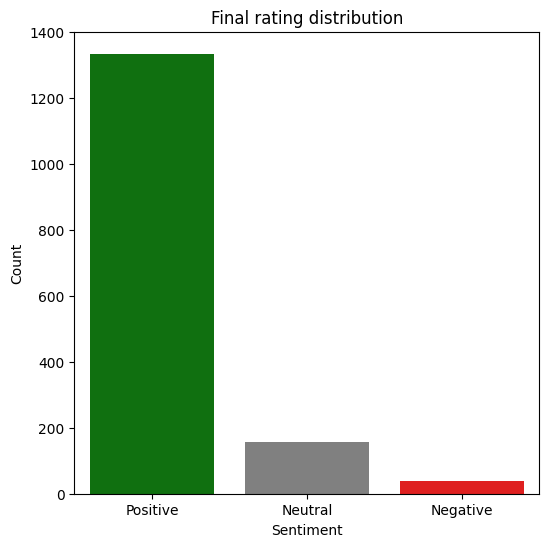

In [11]:

plt.figure(figsize=(6, 6))
sns.countplot(x='final_rating', data=df, palette=['green', 'gray', 'red'])
plt.title('Final rating distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


<h3>Generating Word Clouds</h3>

Generate Word Clouds for different sentiment categories

In [12]:
positive_text = ' '.join(df[df['final_rating'] == 'Positive']['Comment'])
neutral_text = ' '.join(df[df['final_rating'] == 'Neutral']['Comment'])
negative_text = ' '.join(df[df['final_rating'] == 'Negative']['Comment'])
all_comments = ' '.join(df['Comment'])
wordcloud_positive = WordCloud(width=800, height=800,
                               background_color='white',
                               min_font_size=10).generate(positive_text)
wordcloud_neutral = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10).generate(neutral_text)
wordcloud_negative = WordCloud(width=800, height=800,
                               background_color='white',
                               min_font_size=10).generate(negative_text)
wordcloud_all = WordCloud(width=800, height=800,
                          background_color='white',
                          min_font_size=10,
                          random_state=42).generate(all_comments)


<h3>Displaying Word Clouds</h3>

Visualize the Word Clouds using matplotlib to provide an overview of the most common words associated with each sentiment category:

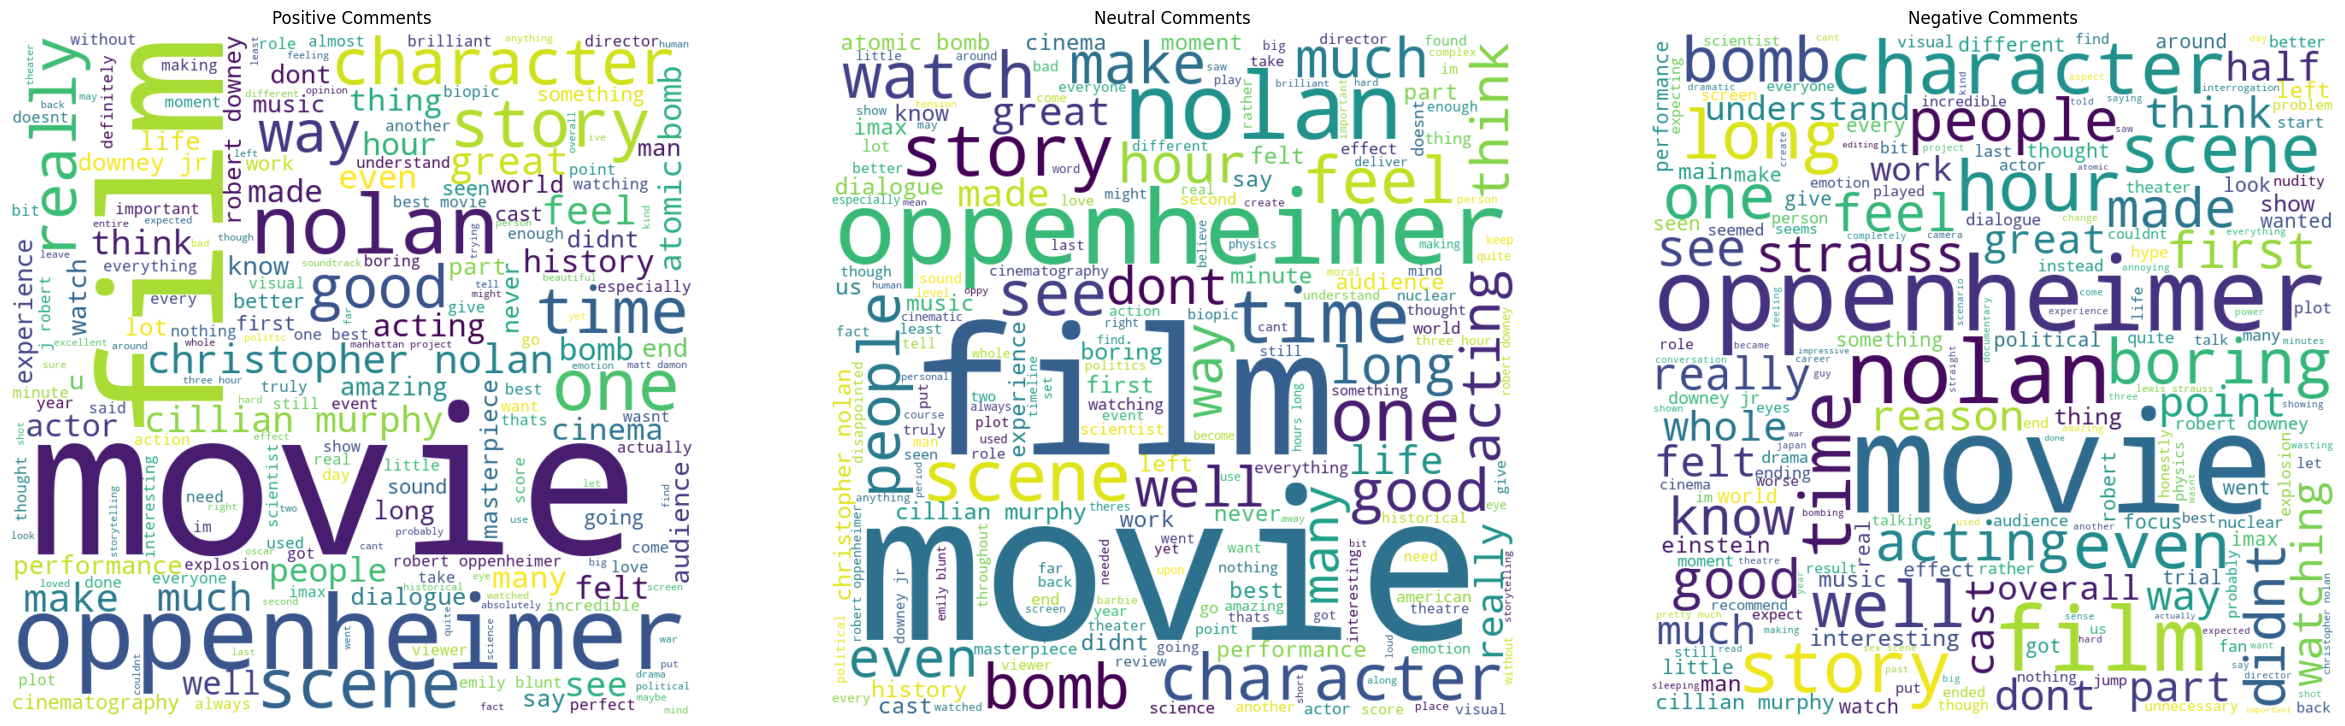

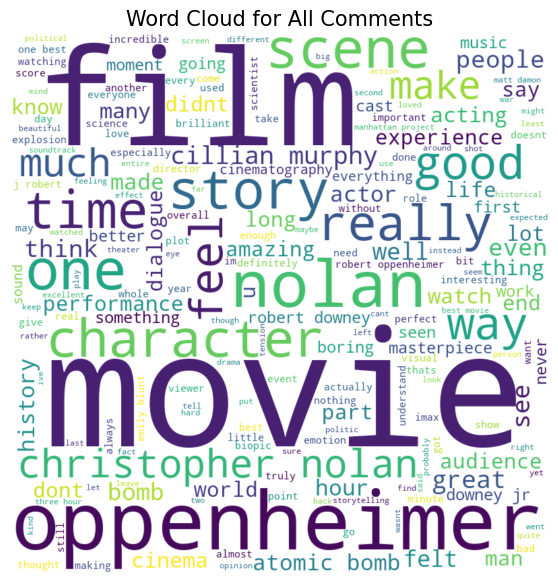

In [13]:
# Word Cloud for Positive, Negative, and Neutral Comments
plt.figure(figsize=(30, 30))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Comments')
plt.axis('off')

plt.subplot(132)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Comments')
plt.axis('off')

plt.subplot(133)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Comments')
plt.axis('off')

plt.show()

# Create Word Cloud for all comments
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud for All Comments', fontsize=15)
plt.axis('off')
plt.show()


<h3>Top 10 Most Common Words</h3>

Analyze the top 10 most common words using word tokenization and Counter:

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


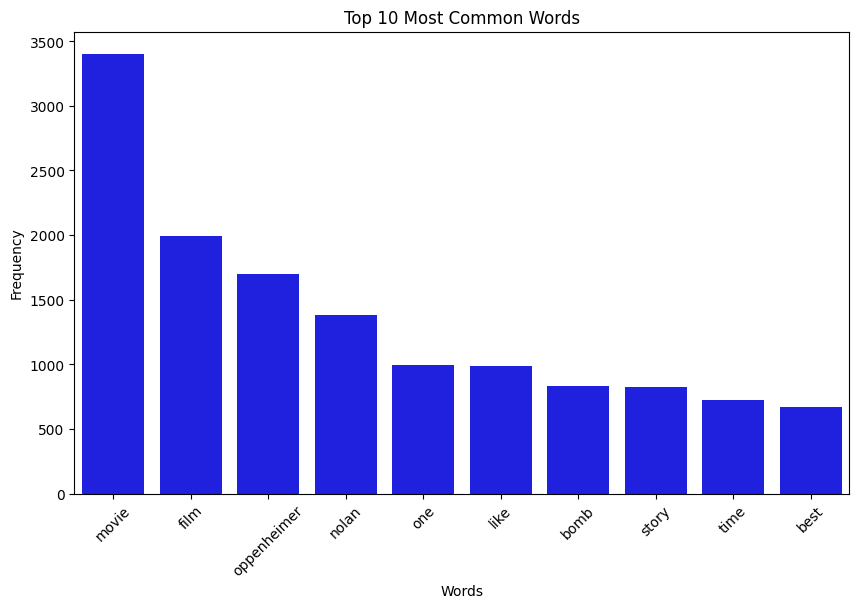

In [19]:
all_words = ' '.join(df['Comment'])
word_tokens = word_tokenize(all_words)
word_counter = Counter(word_tokens)

top_words = word_counter.most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette= ['blue'])
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<h3>Box Plot of Rating vs. Polarity</h3>

Visualize the relationship between Rating and Polarity using a box plot:

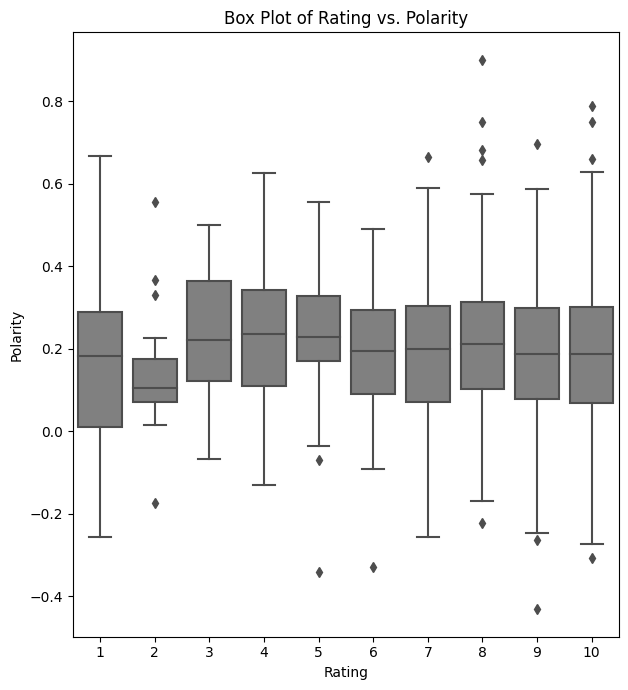

In [20]:
plt.figure(figsize=(12, 7))

# Box plot for Rating
plt.subplot(1, 2, 1)
sns.boxplot(x='Rating', y='Polarity', data=df, palette=['gray'])
plt.title('Box Plot of Rating vs. Polarity')
plt.xlabel('Rating')
plt.ylabel('Polarity')


plt.tight_layout()
plt.show()

<h3>Impact of Comment Length on Sentiment</h3>

Explore how comment length influences sentiment in the dataset.


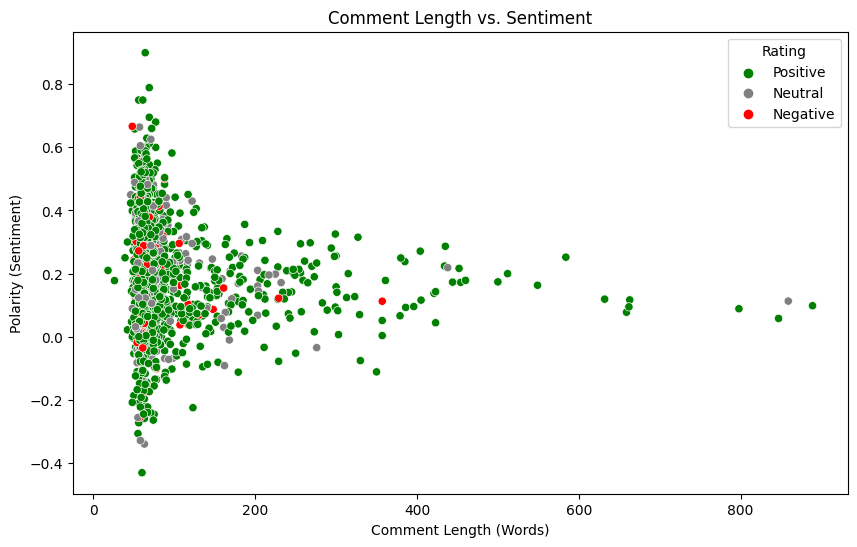

In [21]:
# Calculate comment length in words
df['Comment_Length_Words'] = df['Comment'].apply(lambda x: len(x.split()))

# Calculate comment length in characters
df['Comment_Length_Characters'] = df['Comment'].apply(len)

plt.figure(figsize=(10, 6))

# Scatter plot of comment length vs. polarity (sentiment)
sns.scatterplot(x='Comment_Length_Words', y='Polarity', hue='rating_analysis', data=df, palette=['green', 'gray', 'red'])

plt.title('Comment Length vs. Sentiment')
plt.xlabel('Comment Length (Words)')
plt.ylabel('Polarity (Sentiment)')
plt.legend(title='Rating', loc='upper right')
plt.show()
